In [1]:
import os, random
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
os.path.expanduser = lambda path: './'

In [2]:
batch_size = 128
num_classes = 10
epochs = 60

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [3]:
# for reproducibility
import random, os
os.environ['PYTHONHASHSEED']='0'
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,    inter_op_parallelism_threads=1,
                                                               allow_soft_placement=True, device_count = {'CPU': 1}))
from tensorflow.python.keras import backend as K
K.set_session(sess)


kernel_initializer='glorot_uniform'
activation_function = 'relu'

## 1. DROP OUT 

1. MODEL1 : Drop out= 0.2 학습

In [4]:
print("MODEL1 : Drop out= 0.2 학습 \n")
with tf.device('/cpu:0'):
    model1 = Sequential()
    model1.add(Dense(512, activation='relu', input_shape=(784,)))
    model1.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model1.add(Dense(512, activation='relu'))
    model1.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model1.add(Dense(num_classes, activation='softmax'))
    model1.summary()
    model1.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)
metrics1 = model1.evaluate(x_test, y_test) #returns loss and accuracy

MODEL1 : Drop out= 0.2 학습 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
375/375 [==

2. MODEL2 : Drop out= 0.5 학습

In [5]:
print("MODEL2 : Drop out= 0.5 학습 \n")
with tf.device('/cpu:1'):
    model2 = Sequential()
    model2.add(Dense(512, activation='relu', input_shape=(784,)))
    model2.add(Dropout(0.5))
    #model.add(BatchNormalization())
    model2.add(Dense(512, activation='relu'))
    model2.add(Dropout(0.5))
    #model.add(BatchNormalization())
    model2.add(Dense(num_classes, activation='softmax'))
    model2.summary()
    model2.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)
metrics2 = model2.evaluate(x_test, y_test) #returns loss and accuracy

MODEL2 : Drop out= 0.5 학습 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
375/375 [

3. MODEL3 : Drop out= 0.8 학습

In [6]:
print("MODEL3 : Drop out= 0.8 학습 \n")
with tf.device('/cpu:0'):
    model3 = Sequential()
    model3.add(Dense(512, activation='relu', input_shape=(784,)))
    model3.add(Dropout(0.8))
    #model.add(BatchNormalization())
    model3.add(Dense(512, activation='relu'))
    model3.add(Dropout(0.8))
    #model.add(BatchNormalization())
    model3.add(Dense(num_classes, activation='softmax'))
    model3.summary()
    model3.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
history3 = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

metrics3 = model3.evaluate(x_test, y_test) #returns loss and accuracy
# print(metrics[1])
# print(f'Accuracy: {metrics[1]*100:.2f}%\n')

MODEL3 : Drop out= 0.8 학습 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
375/375 [

4. 정확성 비교 

In [74]:
print(metrics1[1])
print(f'model1(drop out : 0.2 ) Accuracy: {metrics1[1]*100:.2f}%\n')
print(metrics2[1])
print(f'model2(drop out : 0.5 ) Accuracy: {metrics2[1]*100:.2f}%\n')
print(metrics3[1])
print(f'model3(drop out : 0.8 ) Accuracy: {metrics3[1]*100:.2f}%\n')

0.8761000037193298
model1(drop out : 0.2 ) Accuracy: 87.61%

0.8705000281333923
model2(drop out : 0.5 ) Accuracy: 87.05%

0.8513000011444092
model3(drop out : 0.8 ) Accuracy: 85.13%



___________


### Drop out이란 
- 모든 노드를 학습에 참여시키는 것이 아닌 특정 뉴런을 랜덤하게 제거해 학습하는 방식이다. 
- 특정 노드 위주로 학습되는 경향과 노드 간의 강한 연결을 없앨 수 있기 때문에 과적합을 방지하는데 쓰일 수 있다.


#### <해석>
이런 drop out에서는 사용자가 얼마나 많은 존속하는 지에 대한 하이퍼파라미터 p를 설정할 수 있는데 <br>
우리는 각각 0.2, 0.5, 0.8이라는 값을 설정하여 각 모델들을 학습했다.  

</p>

각 drop out 비율에 따른 정확도는 다음과 같다  
> model1(drop out : 0.2 ) Accuracy: 87.61%  
> model2(drop out : 0.5 ) Accuracy: 87.05%  
> model3(drop out : 0.8 ) Accuracy: 85.13%
</p>

<p style="font-size : 15px">
결과는 보면 drop out 비율이 높아짐에 따라 점점 정확도가 줄고 있는 것을 확인할 수 있다.<br>
이는 점점 학습에 참여하는 노드의 수가 줄어듦에 따라 모델의 정보 손실이 그만큼 더 많이 일어났다는 뜻으로 볼 수 있다. <br>
즉, drop out 비율을 높이는 것은 overfitting의 방지에 도움이 될 수 있으나 그만큼 모델이 underfitting이 일어날 가능성이 높아진다는 것을 의미한다. <br>
따라서 적절한 parameter를 설정하는 것이 좋다. 해당 데이터에서는 0.2가 가장 적합하여 보인다.<br>  
이는 아래의 그림에서도 확인할 수 있는데, drop out 비율이 0.2일 때는 validation data와 train data 차이가 거의 없고 전반적으로 높은 정확성을 보이나 drop 비율이 증가할수록 정확성이 점점 감소하는 모습을 보인다.   

</p> 

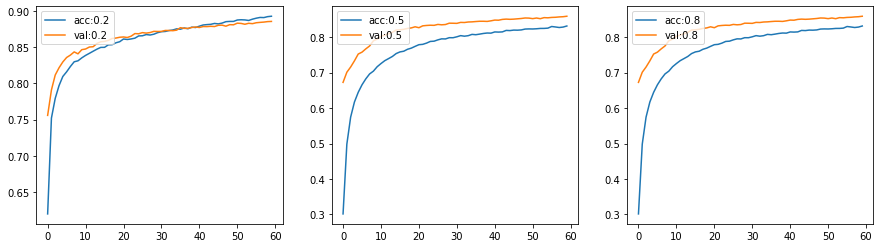

In [69]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['acc:0.2','val:0.2'], loc = 'upper left')
plt.subplot(132)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['acc:0.5','val:0.5'], loc = 'upper left')
plt.subplot(133)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['acc:0.8','val:0.8'], loc = 'upper left')

## 2. Batch BatchNormalization

In [8]:
print("MODEL4 : Drop out= 0.2, batch BatchNormalization \n")
with tf.device('/cpu:0'):
    model4 = Sequential()
    model4.add(Dense(512, activation='relu', input_shape=(784,)))
    model4.add(Dropout(0.2))
    model4.add(BatchNormalization())
    model4.add(Dense(512, activation='relu'))
    model4.add(Dropout(0.2))
    model4.add(BatchNormalization())
    model4.add(Dense(num_classes, activation='softmax'))
    model4.summary()
    model4.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
history4 = model4.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)
metrics4 = model4.evaluate(x_test, y_test) #returns loss and accuracy

MODEL4 : Drop out= 0.2, batch BatchNormalization 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hN

In [9]:
print("MODEL5 : Drop out= 0.5, batch BatchNormalization \n")
with tf.device('/cpu:0'):
    model5 = Sequential()
    model5.add(Dense(512, activation='relu', input_shape=(784,)))
    model5.add(Dropout(0.5))
    model5.add(BatchNormalization())
    model5.add(Dense(512, activation='relu'))
    model5.add(Dropout(0.5))
    model5.add(BatchNormalization())
    model5.add(Dense(num_classes, activation='softmax'))
    model5.summary()
    model5.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
history5 = model5.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)
metrics5 = model5.evaluate(x_test, y_test) #returns loss and accuracy

MODEL5 : Drop out= 0.5, batch BatchNormalization 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hN

In [10]:
print("MODEL6 : Drop out= 0.8, batch BatchNormalization \n")
with tf.device('/cpu:0'):
    model6 = Sequential()
    model6.add(Dense(512, activation='relu', input_shape=(784,)))
    model6.add(Dropout(0.8))
    #model.add(BatchNormalization())
    model6.add(Dense(512, activation='relu'))
    model6.add(Dropout(0.8))
    #model.add(BatchNormalization())
    model6.add(Dense(num_classes, activation='softmax'))
    model6.summary()
    model6.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
history6 = model6.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

metrics6 = model6.evaluate(x_test, y_test) #returns loss and accuracy

MODEL6 : Drop out= 0.8, batch BatchNormalization 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________________________________________

In [11]:
# print(metrics4[1])
# print(f'model4(Batch normalization) Accuracy: {metrics4[1]*100:.2f}%\n')
# print(metrics5[1])
# print(f'model5(Batch normalization) Accuracy: {metrics5[1]*100:.2f}%\n')
# print(metrics6[1])
# print(f'model5(Batch normalization) Accuracy: {metrics6[1]*100:.2f}%')
print("drop out: 0.2")
print(f'model1 Accuracy: {metrics1[1]*100:.2f}%')
print(f'model4(Batch normalization) Accuracy: {metrics4[1]*100:.2f}%\n')


print("drop out: 0.5")
print(f'model2 Accuracy: {metrics2[1]*100:.2f}%')
print(f'model5(Batch normalization) Accuracy: {metrics5[1]*100:.2f}%\n')

print("drop out: 0.8")
print(f'model3 Accuracy: {metrics3[1]*100:.2f}%')
print(f'model5(Batch normalization) Accuracy: {metrics6[1]*100:.2f}%')

drop out: 0.2
model1 Accuracy: 87.61%
model4(Batch normalization) Accuracy: 88.82%

drop out: 0.5
model2 Accuracy: 87.05%
model5(Batch normalization) Accuracy: 88.29%

drop out: 0.8
model3 Accuracy: 85.13%
model5(Batch normalization) Accuracy: 85.07%


___________


### Batch Normalization이란 
> 입력값이 양극단으로 간다면 미분 기울기가 0에 가까워져 vanishing gradient 문제에 빠질 수 있다.  
> 만약 vanishing gradient가 일어난다면 학습량이 현저하게 줄어 레이어가 깊어질수록 에러를 잘 학습하지 못하게 되고 local minima에 빠질 우려가 있다.  
> 이 때문에 우리는 정규화를 통해 학습 속도를 개선하고 정확성을 높이는 방법을 사용한다.  
> 더욱이 Batch BatchNormalization을 통한다면 정규화된 값에 scale인 r(감마)와 shift인 b(베타)를 통해 원래의 값과 정규화된 값 사이의 값을 학습시킬 수 있다.   


#### <해석>


<p>

앞서 본 각각의 drop out 비율에 Batch Normalization을 적용한 결과는 다음과 같다

drop out: 0.2  
> model 1 Accuracy: 87.61%  
> model 4 (Batch normalization) Accuracy: 88.82%   
   
drop out: 0.5  
> model 2 Accuracy: 87.05%  
> model 5 (Batch normalization) Accuracy: 88.29%  

drop out: 0.8  
> model 3 Accuracy: 85.13%  
> model 5 (Batch normalization) Accuracy: 85.07%  
</p>

<p style="font-size : 15px">
결과는 보면 drop 비율이 0.2, 0.5인 경우 정확도가 조금이나마 증가하는 것을 볼 수 있다.<br> 이는 Batch Normalization을 통해 학습 속도 개선이 일어나 같은 iteration(60)에서 성능 향상이 일어났다는 것으로 볼 수 있다. <br> 
하지만 비율이 0.8인 모델에서는 오히려 정확성이 Batch Normalization 이전에 비해 감소하는 경향을 보였는데 이는 drop out 비율이 높아짐에 따라 해당 모델이 undefitting되어 데이터를 잘 설명하지 못하기 때문이라 볼 수 있다.

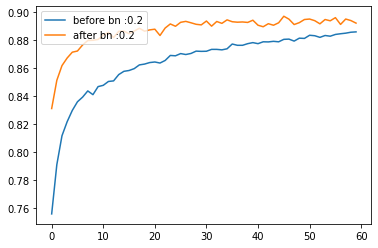

In [82]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.legend(['before bn :0.2','after bn :0.2'], loc = 'upper left')

위의 그림은 drop out 비율이 0.2일 때의 정확도의 변화 양상을 나타낸 것인데 batch normalization 이후 성능이 눈에 띄게 좋아진 것을 확인할 수 있다. 

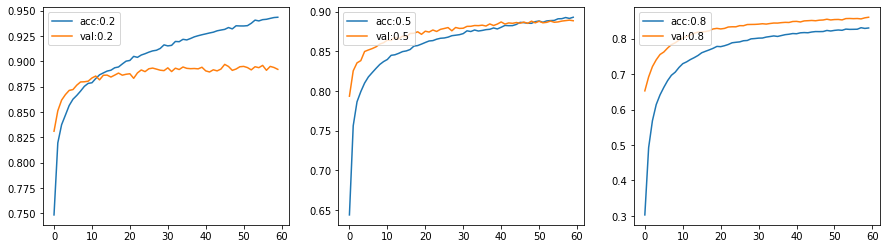

In [68]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.legend(['acc:0.2','val:0.2'], loc = 'upper left')
plt.subplot(132)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.legend(['acc:0.5','val:0.5'], loc = 'upper left')
plt.subplot(133)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.legend(['acc:0.8','val:0.8'], loc = 'upper left')

In [83]:
print('학번: 20160608 이름 : 이지훈')

학번: 20160608 이름 : 이지훈
